I want to make a lot of plots of just diverent observation paramiters for the data.

In [1]:
from astropy.table import Table, Column
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
import astropy.units as u
from astropy.constants import G, sigma_sb, c
import scipy.stats

import warnings
warnings.filterwarnings('ignore')

In [2]:
%run Binary_Data_Clean2.py
Tables = Binary_Data_Clean2('/home/cody/Binary Search/2nd_Data_Set/allMC.avg.58247.fits','/home/cody/Binary Search/2nd_Data_Set/allVisit-t9-l31c-58247.mc.fits',
                          '/home/cody/Binary Search/parsec_decamsdss_all.fits.gz')
AllAvg, AllVis, ISO = Tables.get_data()
AllVis = Tables.too_fast(AllVis,SNR_cut = True)
AllAvg = Tables.nvisits_cut(AllAvg,5)
AAS_RG = Tables.rg_cut(AllAvg)
AAS_RG_ISO = Tables.iso_fit(AAS_RG, ISO)
AAS_RV = Tables.rv_table_add(AAS_RG_ISO, AllVis)
AllAvg_LMC_5 = Tables.mc_cut(AAS_RV, 'L')
AllAvg_SMC_5 = Tables.mc_cut(AAS_RV, 'S')

In [3]:
mean_vis_LMC = np.mean(AllAvg_LMC_5['NVISITS'])
mean_vis_SMC = np.mean(AllAvg_SMC_5['NVISITS'])
print('mean NVISITS for LMC Sample', mean_vis_LMC, '\n Mean NVISITS for SMC sample', mean_vis_SMC)
print('Number of stars in the LMC {}, SMC {}.'.format(len(AllAvg_LMC_5),len(AllAvg_SMC_5)))

mean NVISITS for LMC Sample 7.101949025487256 
 Mean NVISITS for SMC sample 6.034013605442177
Number of stars in the LMC 1334, SMC 441.


Made a cut to SNR, got rid of any observations with and SNR < 5. This will cause the number of data points to be different from 'NVISITS' in the allMC.avg. table because that kept low SNR measuments in it's calculations. 

In [4]:
AllVis_LMC = Tables.mc_cut(AllVis, 'L')
AllVis_SMC = Tables.mc_cut(AllVis, 'S')

Text(0.5,1,'Normaled Histogram')

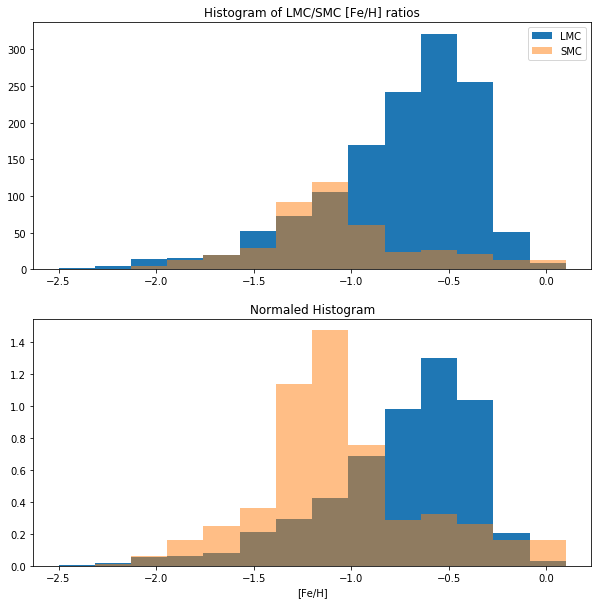

In [5]:
fig, (ax1,ax2) = plt.subplots(2,1,figsize = (10,10))
ax1.hist(AllAvg_LMC_5['FE_H'], color = 'C0', bins = np.linspace(-2.5,.1,15), label = 'LMC')
ax1.hist(AllAvg_SMC_5['FE_H'], color = 'C1', alpha = 0.5,bins = np.linspace(-2.5,.1,15),label = 'SMC')

ax2.hist(AllAvg_LMC_5['FE_H'], color = 'C0', bins = np.linspace(-2.5,.1,15), normed=True)
ax2.hist(AllAvg_SMC_5['FE_H'], color = 'C1', alpha = 0.5,bins = np.linspace(-2.5,.1,15), normed=True)

fig.tight_layout
ax1.set_title('Histogram of LMC/SMC [Fe/H] ratios')
ax1.legend()
ax2.set_xlabel('[Fe/H]')
ax2.set_title('Normaled Histogram')

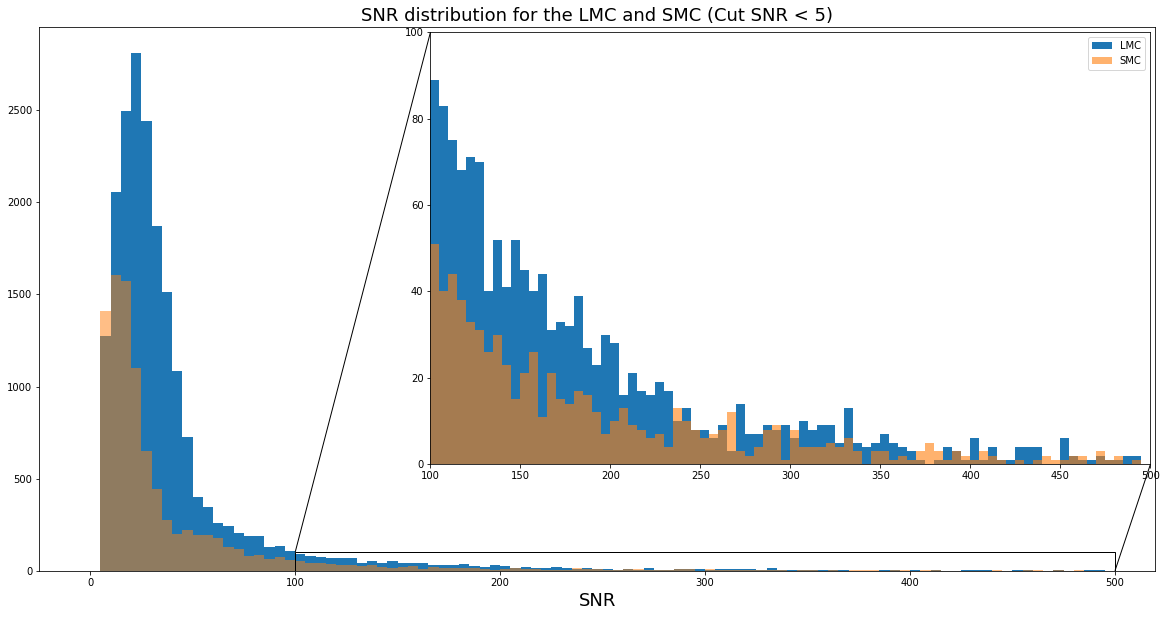

In [6]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
fig, ax = plt.subplots(figsize = (20,10)) # create a new figure with a default 111 subplot
ax.hist(AllVis_LMC['SNR'],bins = np.arange(0,500,5),label='LMC')
ax.hist(AllVis_SMC['SNR'],bins = np.arange(0,500,5), alpha = 0.5, label = 'SMC')
axins = inset_axes(ax, width = 10, height = 6, loc =1,) 
axins.hist(AllVis_LMC['SNR'],bins = np.arange(0,500,5),label='LMC',)
axins.hist(AllVis_SMC['SNR'],bins = np.arange(0,500,5), alpha = 0.6, label = 'SMC')
x1, x2, y1, y2 = 100, 500, 0, 100 # specify the limits
axins.set_xlim(x1, x2) # apply the x-limits
axins.set_ylim(y1, y2) # apply the y-limits

mark_inset(ax, axins, loc1=2, loc2=4, fc="none", ec = '0')

ax.set_title('SNR distribution for the LMC and SMC (Cut SNR < 5)', size = 18)
ax.set_xlabel('SNR', size = 18)
plt.legend()
plt.show()

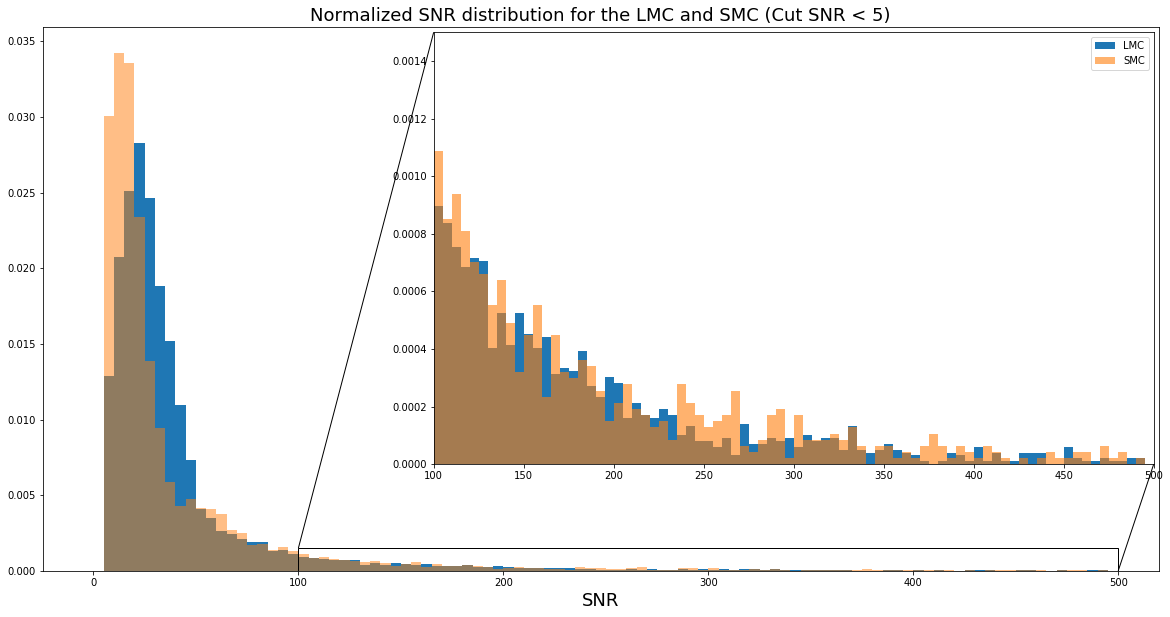

In [7]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
fig, ax = plt.subplots(figsize = (20,10)) # create a new figure with a default 111 subplot
ax.hist(AllVis_LMC['SNR'],bins = np.arange(0,500,5), density= True,label='LMC')
ax.hist(AllVis_SMC['SNR'],bins = np.arange(0,500,5), alpha = 0.5,density=True, label = 'SMC')
axins = inset_axes(ax, width = 10, height = 6, loc =1,) 
axins.hist(AllVis_LMC['SNR'],bins = np.arange(0,500,5), density= True,label='LMC',)
axins.hist(AllVis_SMC['SNR'],bins = np.arange(0,500,5), alpha = 0.6,density=True, label = 'SMC')
x1, x2, y1, y2 = 100, 500, 0, 0.0015 # specify the limits
axins.set_xlim(x1, x2) # apply the x-limits
axins.set_ylim(y1, y2) # apply the y-limits

mark_inset(ax, axins, loc1=2, loc2=4, fc="none", ec="0")

ax.set_title('Normalized SNR distribution for the LMC and SMC (Cut SNR < 5)', size = 18)
ax.set_xlabel('SNR', size = 18)

plt.legend()
plt.show()

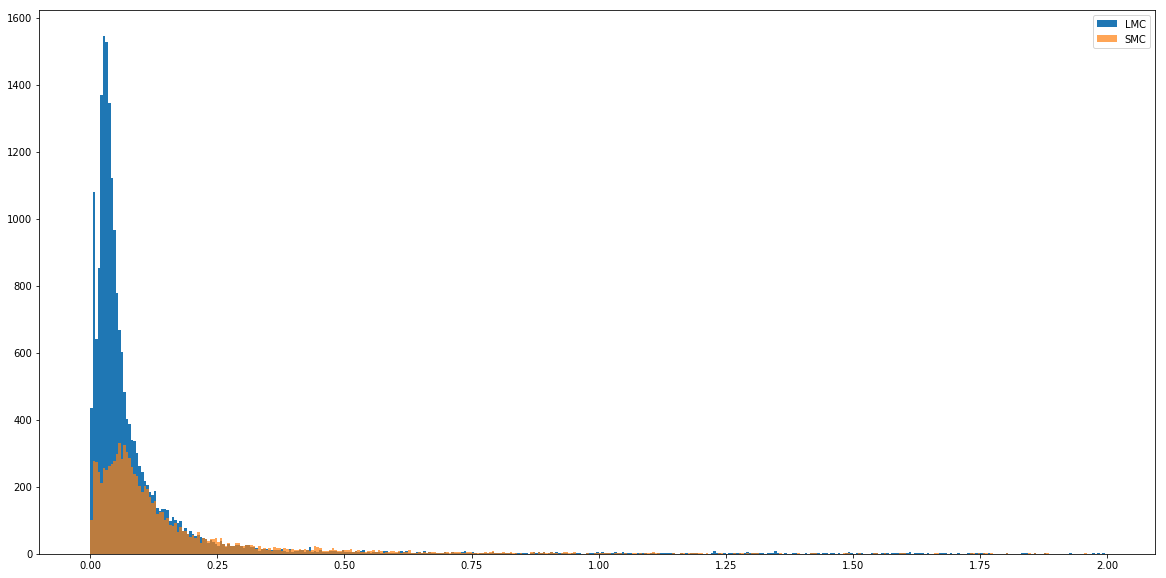

133
110


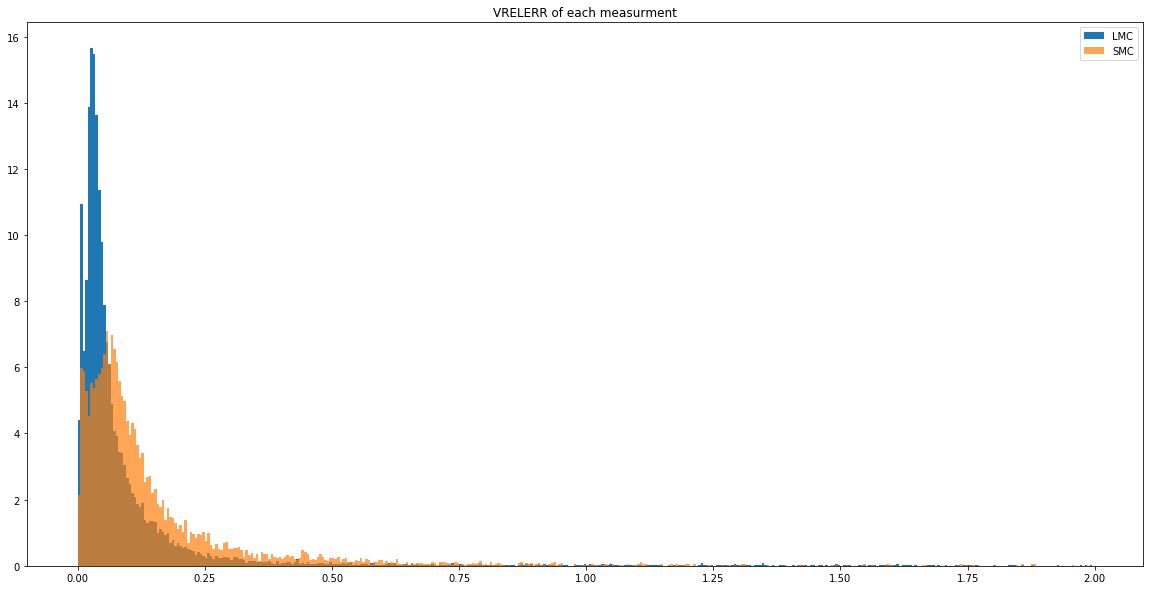

In [8]:
fig, ax = plt.subplots(figsize = (20,10)) # create a new figure with a default 111 subplot
ax.hist(AllVis_LMC['VRELERR'],bins = np.arange(0,2,.005),label='LMC')
ax.hist(AllVis_SMC['VRELERR'],bins = np.arange(0,2,.005),alpha = 0.7, label='SMC')
plt.legend()
plt.show()
print(len(AllVis_LMC[AllVis_LMC['VRELERR'] > 2]))
print(len(AllVis_SMC[AllVis_SMC['VRELERR'] > 2]))

fig, ax = plt.subplots(figsize = (20,10)) # create a new figure with a default 111 subplot
ax.hist(AllVis_LMC['VRELERR'],bins = np.arange(0,2,.005),density=True,label='LMC')
ax.hist(AllVis_SMC['VRELERR'],bins = np.arange(0,2,.005),alpha = 0.7, density=True, label='SMC')
plt.title('VRELERR of each measurment')
plt.legend()
plt.show()

In [9]:
my_nvisits_lmc = []
my_nvisits_smc = []
for n in AllAvg_LMC_5['RADIALV']:
    my_nvisits_lmc.append(len(n))
for n in AllAvg_SMC_5['RADIALV']:
    my_nvisits_smc.append(len(n))

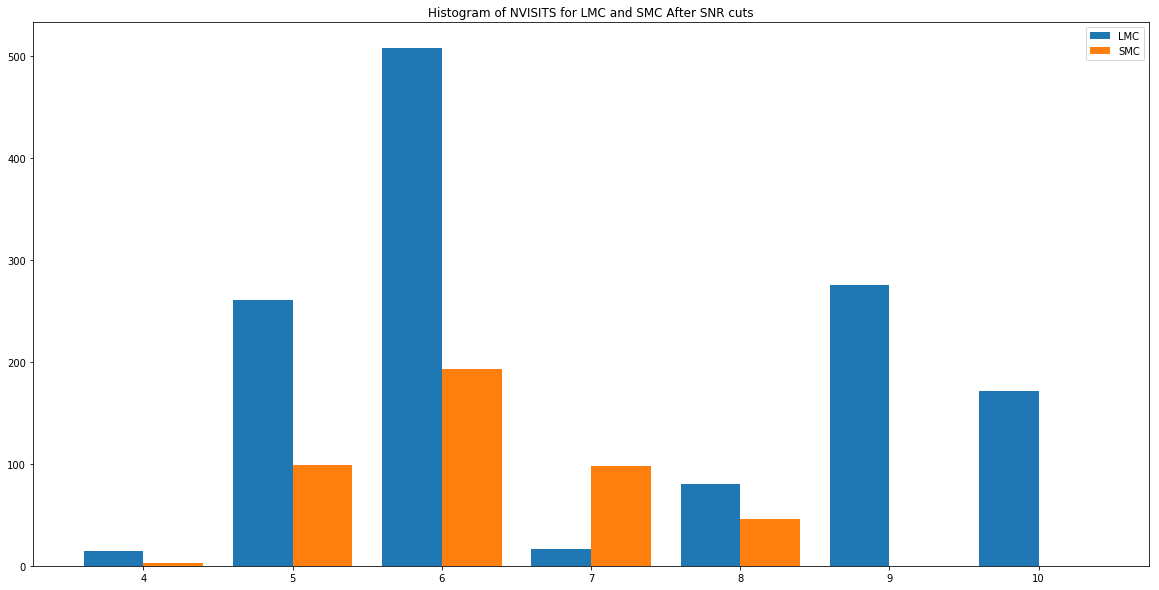

In [10]:
plt.figure(figsize = (20,10))
plt.title('Histogram of NVISITS for LMC and SMC After SNR cuts')
#plt.hist(my_nvisits_lmc, bins = range(4,12), rwidth=0.5,
#         align = 'left', label = 'LMC', stacked = False)
#plt.hist(my_nvisits_smc, bins = range(4,12), rwidth=0.5,
#         align = 'left', alpha = 0.7, label = 'SMC',stacked = False)
plt.hist([my_nvisits_lmc, my_nvisits_smc], bins = range(4,12), label = ['LMC', 'SMC'], align = 'left')
plt.legend()

In [11]:
%run Binary_Fraction.py
thing_LMC_5 = Binary_Fraction(AllAvg_LMC_5)
thing_SMC_5 = Binary_Fraction(AllAvg_SMC_5)
real_data_detection_LMC_5, binary_bool_LMC_5, LMC_binary_detection_5, rd_err_LMC = thing_LMC_5.Real_Data_Fraction()
real_data_detection_SMC_5, binary_bool_SMC_5, SMC_binary_detection_5,rd_err_SMC = thing_SMC_5.Real_Data_Fraction()

In [12]:
epoch_spanLMC = []
for n in range(len(AllAvg_LMC_5[binary_bool_LMC_5])):
    foo = AllAvg_LMC_5[binary_bool_LMC_5]['RADIAL_DATE'][n][-1] - AllAvg_LMC_5[binary_bool_LMC_5]['RADIAL_DATE'][n][0]
    epoch_spanLMC.append(foo)

epoch_spanLMC_all = []
for n in range(len(AllAvg_LMC_5)):
    foo = AllAvg_LMC_5['RADIAL_DATE'][n][-1] - AllAvg_LMC_5['RADIAL_DATE'][n][0]
    epoch_spanLMC_all.append(foo)
epoch_spanSMC = []
for n in range(len(AllAvg_SMC_5[binary_bool_SMC_5])):
    foo = AllAvg_SMC_5[binary_bool_SMC_5]['RADIAL_DATE'][n][-1] - AllAvg_SMC_5[binary_bool_SMC_5]['RADIAL_DATE'][n][0]
    epoch_spanSMC.append(foo)

epoch_spanSMC_all = []
for n in range(len(AllAvg_SMC_5)):
    foo = AllAvg_SMC_5['RADIAL_DATE'][n][-1] - AllAvg_SMC_5['RADIAL_DATE'][n][0]
    epoch_spanSMC_all.append(foo)

Graph below is a histogram of the total span in epochs.

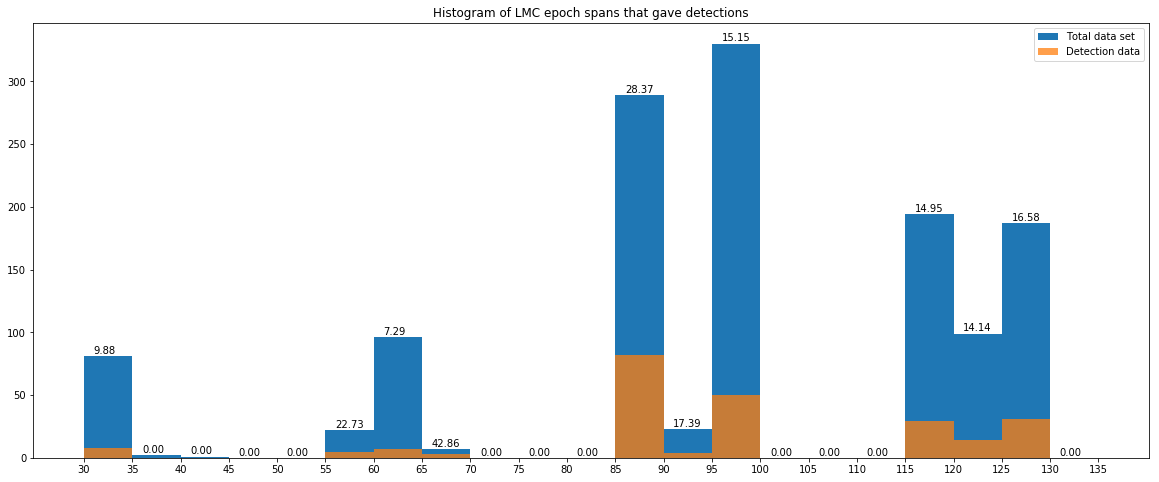

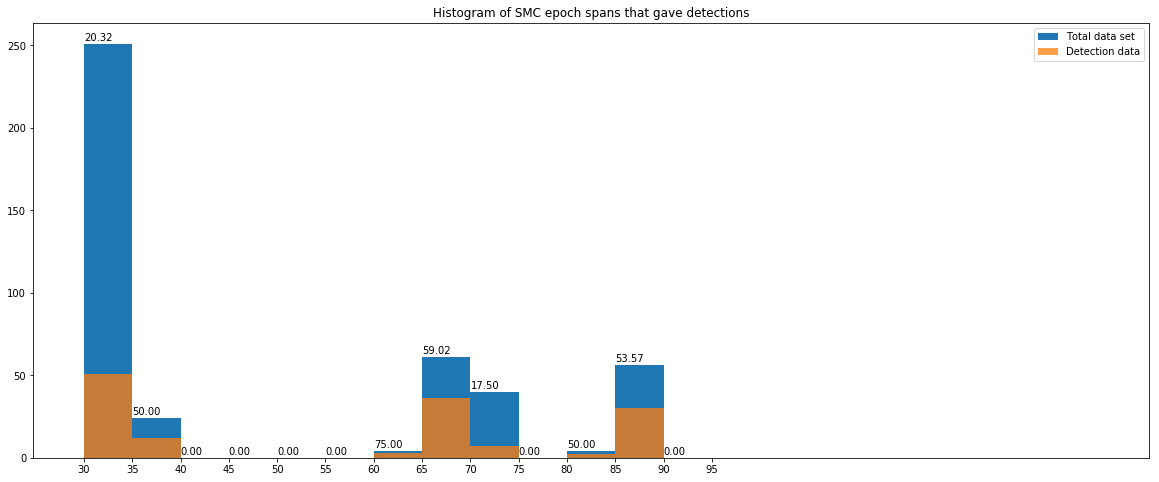

In [13]:
plt.figure(figsize = (20,8))
plt.title('Histogram of LMC epoch spans that gave detections')
x1 = plt.hist(epoch_spanLMC_all, bins = np.arange(30,140,5), label = 'Total data set')
y1 = plt.hist(epoch_spanLMC,bins = np.arange(30,140,5), alpha = 0.75,label = 'Detection data')
plt.xticks(np.arange(30,140,5))
for i in range(len(np.arange(30,140,5))-1):
    percent = "{0:.2f}".format(y1[0][i]/(x1[0][i]+1e-15)*100)
    plt.text(x1[1][i]+1,x1[0][i]+2,percent)
plt.legend()
plt.show()

plt.figure(figsize = (20,8))
plt.title('Histogram of SMC epoch spans that gave detections')
x2 = plt.hist(epoch_spanSMC_all, bins = np.arange(30,100,5), label = 'Total data set')
y2 = plt.hist(epoch_spanSMC,bins = np.arange(30,140,5), alpha = 0.75, label = 'Detection data')
for i in range(len(np.arange(30,100,5))-1):
    percent = "{0:.2f}".format(y2[0][i]/(x2[0][i]+1e-15)*100)
    plt.text(x2[1][i],x2[0][i]+2,percent)
plt.xticks(np.arange(30,100,5))
plt.legend()
plt.show()

Next is a similar plot to the above one but this time we look at the metalicity distribution for the total data set and the detection data. 

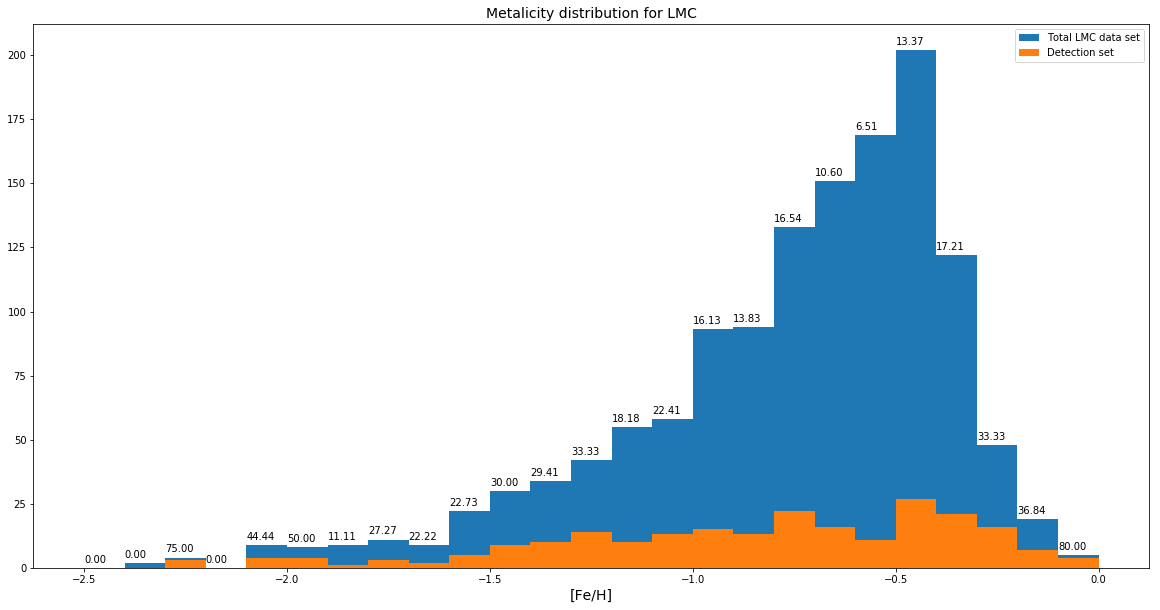

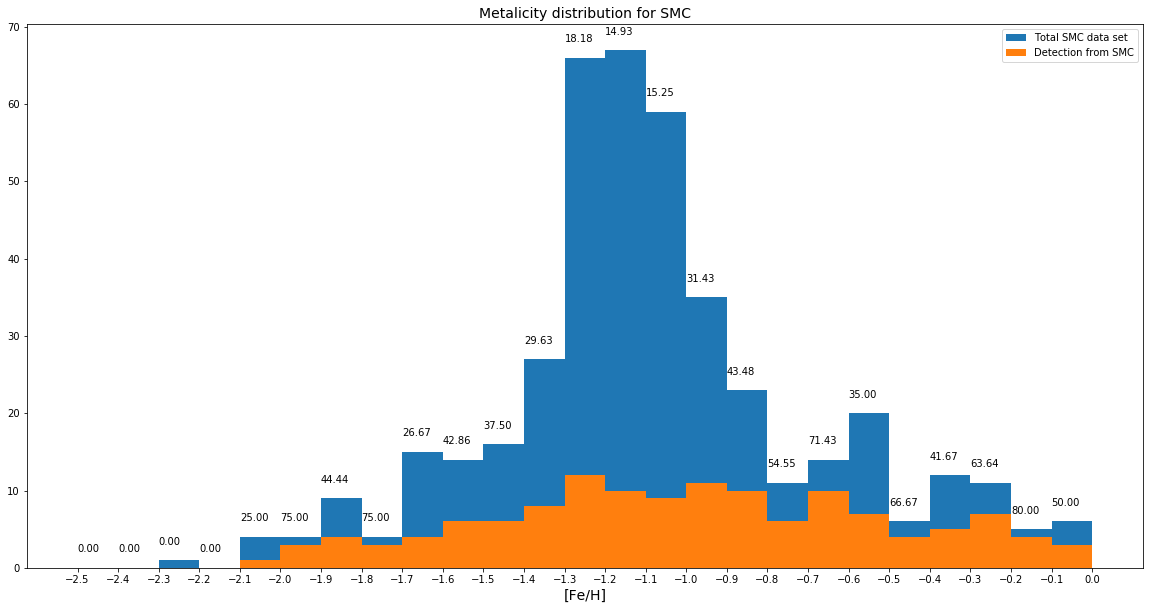

In [14]:
plt.figure(figsize=(20,10))
x = plt.hist(AllAvg_LMC_5['FE_H'], bins = np.arange(-2.5,0.1,0.1), label = 'Total LMC data set')
y = plt.hist(AllAvg_LMC_5[binary_bool_LMC_5]['FE_H'],bins = np.arange(-2.5,0.1,0.1), label = 'Detection set')
plt.legend()
plt.title('Metalicity distribution for LMC', size = 14)
plt.xlabel('[Fe/H]', size = 14)
foo_list = []
for i in range(len(np.arange(-2.5,0.1,0.1))-1):
    percent = "{0:.2f}".format(y[0][i]/(x[0][i]+1e-15)*100)
    plt.text(x[1][i],x[0][i]+2,percent)
    foo_list.append(y[0][i]/(x[0][i]+1e-15)*100)
plt.show()

plt.figure(figsize=(20,10))
x = plt.hist(AllAvg_SMC_5['FE_H'], bins = np.arange(-2.5,0.1,0.1), label = 'Total SMC data set')
y = plt.hist(AllAvg_SMC_5[binary_bool_SMC_5]['FE_H'], bins = np.arange(-2.5,0.1,0.1), label = 'Detection from SMC')
plt.xticks(np.arange(-2.5,0.1,0.1))
foo_list2 = []
for i in range(len(np.arange(-2.5,0.1,0.1))-1):
    percent = "{0:.2f}".format(y[0][i]/(x[0][i]+1e-15)*100)
    plt.text(x[1][i],x[0][i]+2,percent)
    foo_list2.append(y[0][i]/(x[0][i]+1e-15)*100)
plt.legend()
plt.title('Metalicity distribution for SMC', size = 14)
plt.xlabel('[Fe/H]', size = 14)
plt.show()

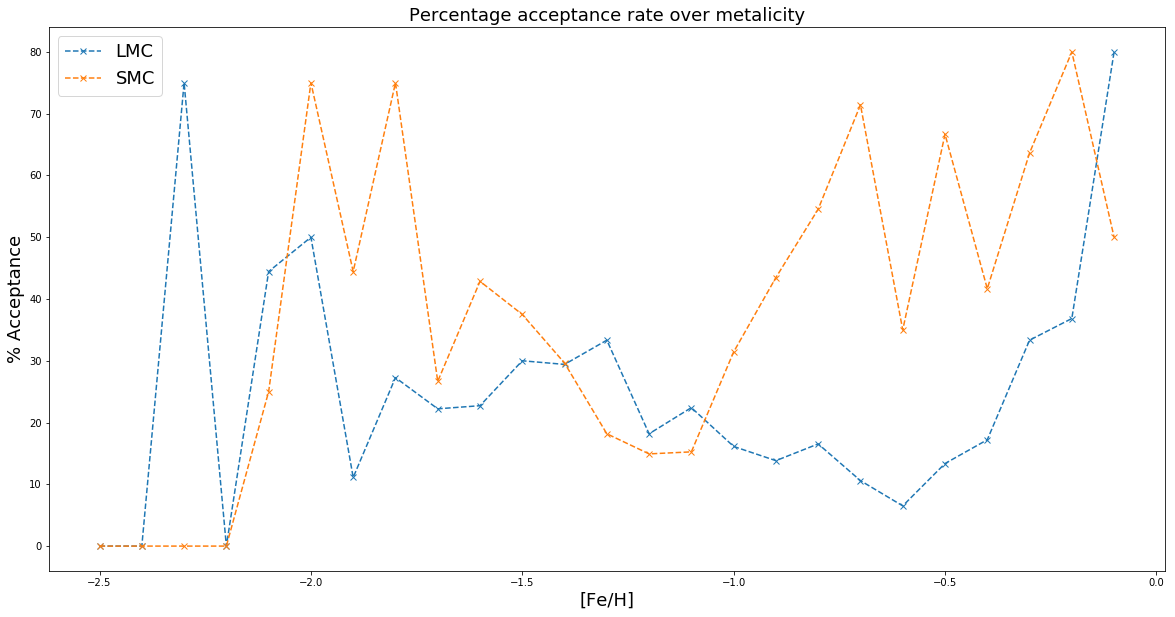

In [15]:
plt.figure(figsize = (20,10))
plt.plot(x[1][:-1],foo_list,'x--', label =  'LMC')
plt.plot(x[1][:-1],foo_list2,'x--', label = 'SMC')
plt.title('Percentage acceptance rate over metalicity', size = 18)
plt.ylabel('% Acceptance', size = 18)
plt.xlabel('[Fe/H]', size = 18)
plt.legend(prop = {'size': 18})
plt.show()

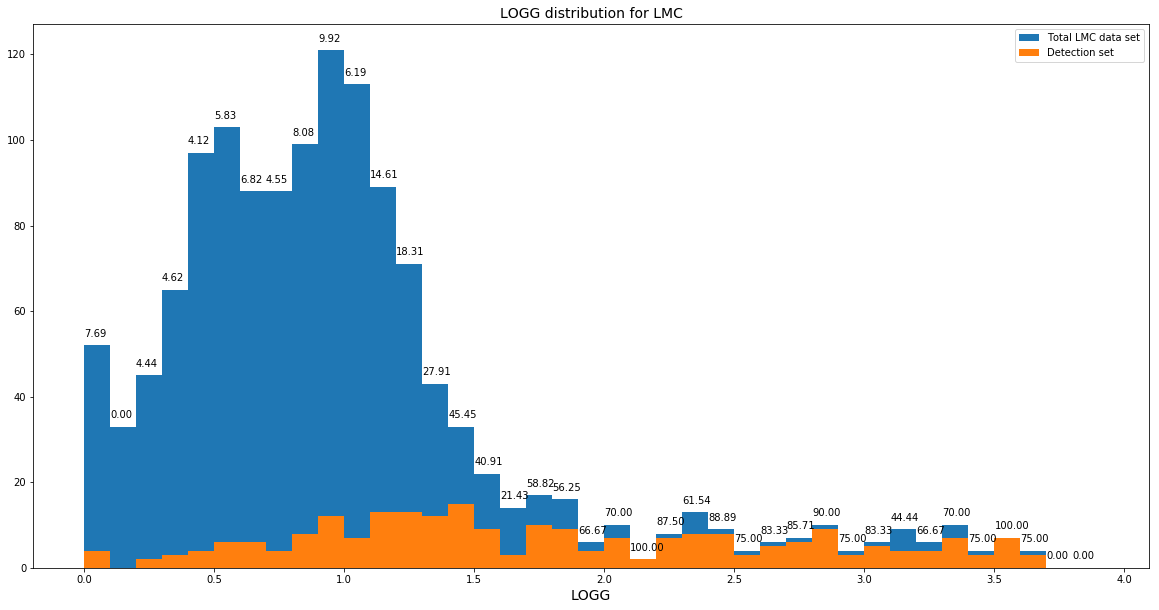

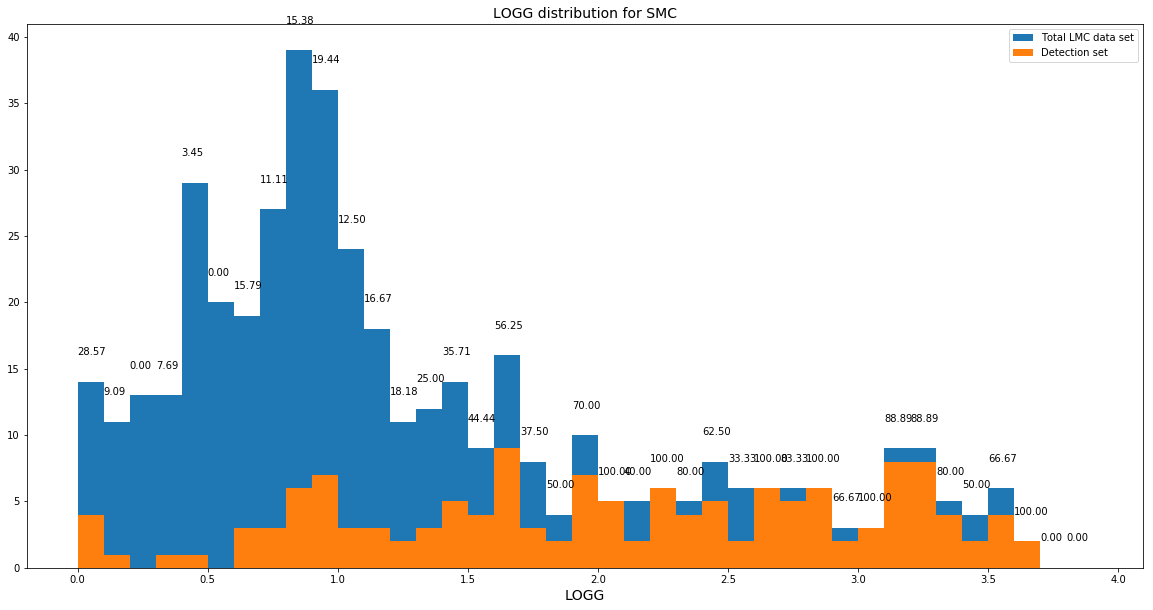

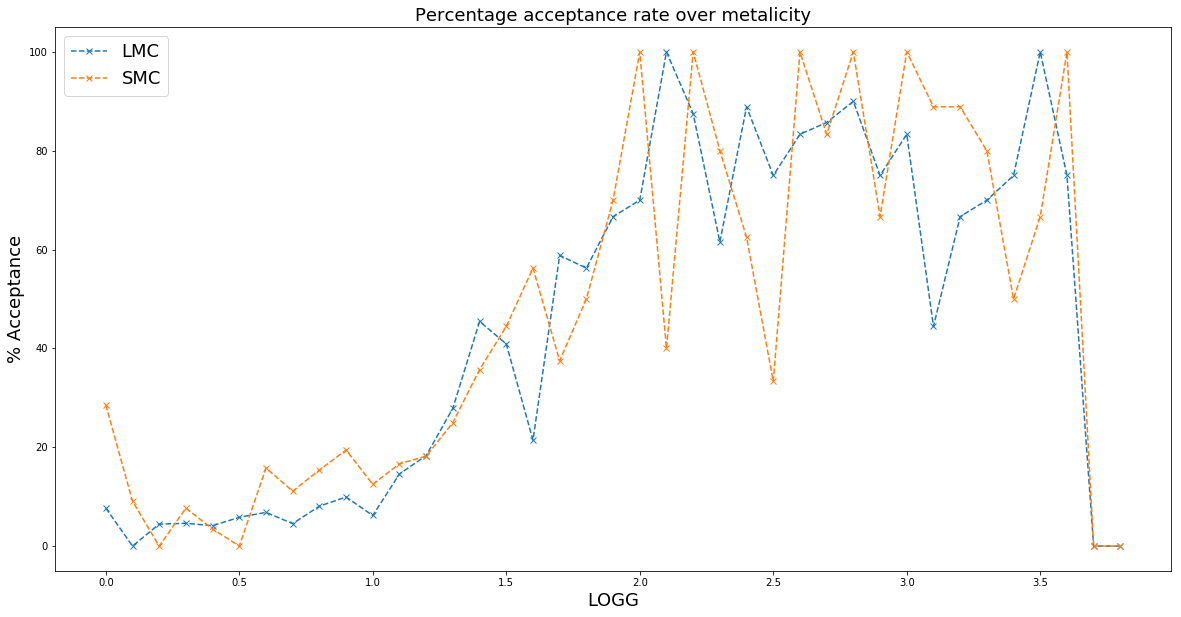

In [22]:
plt.figure(figsize=(20,10))
bins = np.arange(0, 4, 0.1)
x = plt.hist(AllAvg_LMC_5['LOGG'],bins = bins, label = 'Total LMC data set')
y = plt.hist(AllAvg_LMC_5[binary_bool_LMC_5]['LOGG'],bins = bins, label = 'Detection set')
plt.legend()
plt.title('LOGG distribution for LMC', size = 14)
plt.xlabel('LOGG', size = 14)
foo_list = []
for i in range(len(bins)-1):
    percent = "{0:.2f}".format(y[0][i]/(x[0][i]+1e-15)*100)
    plt.text(x[1][i],x[0][i]+2,percent)
    foo_list.append(y[0][i]/(x[0][i]+1e-15)*100)
plt.show()

plt.figure(figsize=(20,10))
bins = np.arange(0, 4, 0.1)
x = plt.hist(AllAvg_SMC_5['LOGG'],bins = bins, label = 'Total LMC data set')
y = plt.hist(AllAvg_SMC_5[binary_bool_SMC_5]['LOGG'],bins = bins, label = 'Detection set')
plt.legend()
plt.title('LOGG distribution for SMC', size = 14)
plt.xlabel('LOGG', size = 14)
foo_list2 = []
for i in range(len(bins)-1):
    percent = "{0:.2f}".format(y[0][i]/(x[0][i]+1e-15)*100)
    plt.text(x[1][i],x[0][i]+2,percent)
    foo_list2.append(y[0][i]/(x[0][i]+1e-15)*100)
plt.show()

plt.figure(figsize = (20,10))
plt.plot(x[1][:-1],foo_list,'x--', label =  'LMC')
plt.plot(x[1][:-1],foo_list2,'x--', label = 'SMC')
plt.title('Percentage acceptance rate over metalicity', size = 18)
plt.ylabel('% Acceptance', size = 18)
plt.xlabel('LOGG', size = 18)
plt.legend(prop = {'size': 18})
plt.show()

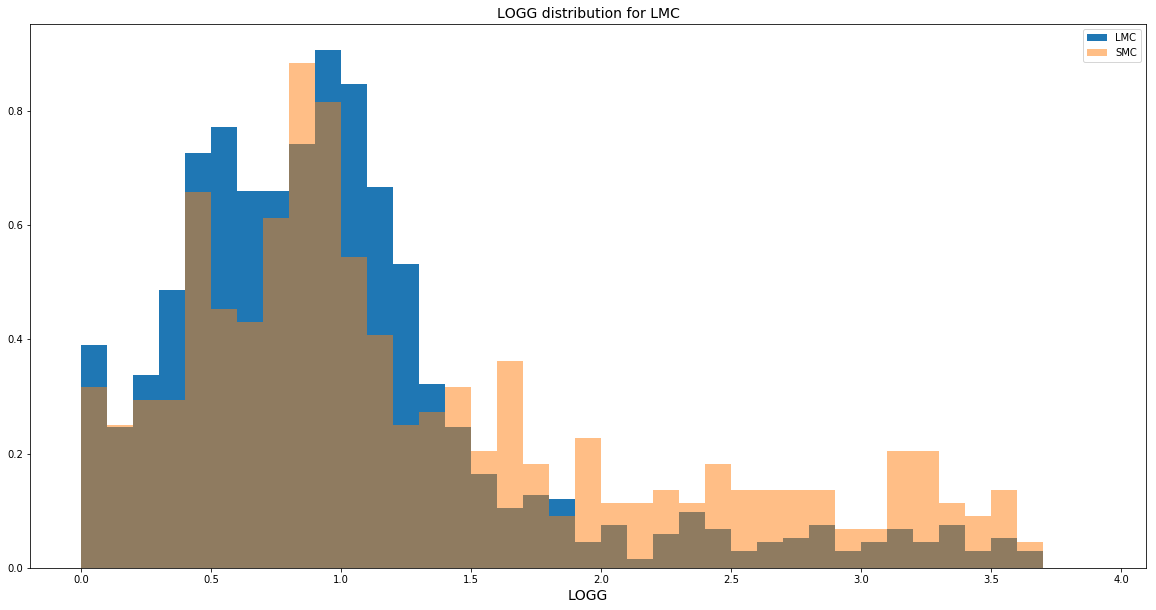

In [17]:
plt.figure(figsize=(20,10))
bins = np.arange(0, 4, 0.1)
plt.hist(AllAvg_LMC_5['LOGG'],bins = bins, label = 'LMC', density=True)
plt.hist(AllAvg_SMC_5['LOGG'],bins = bins, label = 'SMC', density=True, alpha = 0.5)
plt.legend()
plt.title('LOGG distribution for LMC', size = 14)
plt.xlabel('LOGG', size = 14)
plt.show()

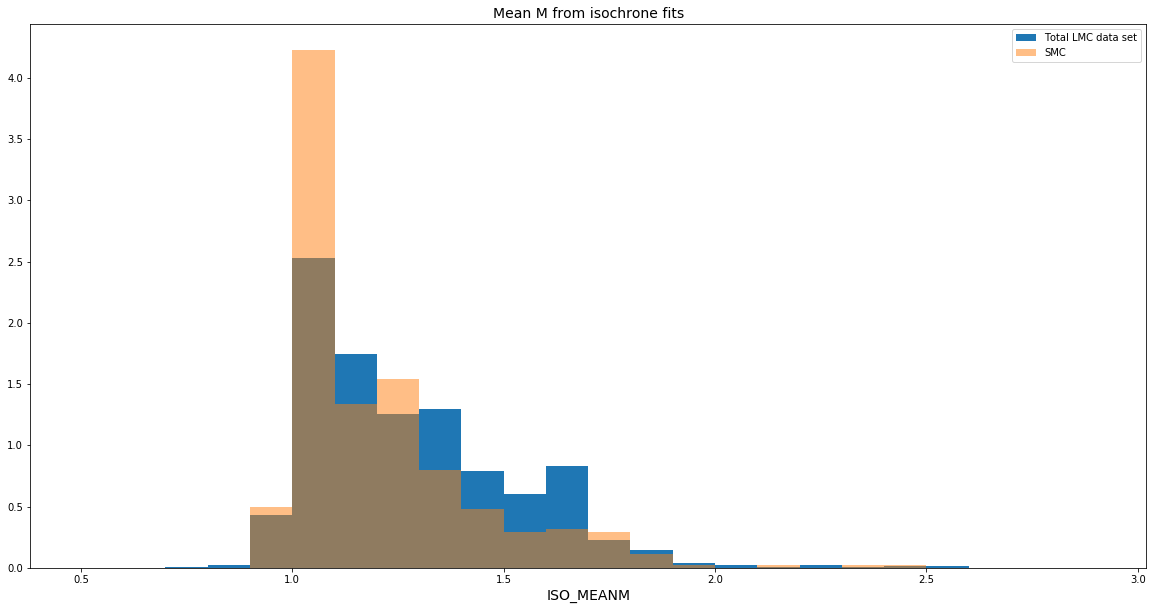

In [18]:
plt.figure(figsize=(20,10))
bins = np.arange(0.5, 3, 0.1)
plt.hist(AllAvg_LMC_5['ISO_MEANM'],bins = bins, label = 'Total LMC data set', density=True)
plt.hist(AllAvg_SMC_5['ISO_MEANM'],bins = bins, label = 'SMC', density=True, alpha = 0.5)
plt.legend()
plt.title('Mean M from isochrone fits', size = 14)
plt.xlabel('ISO_MEANM', size = 14)
plt.show()

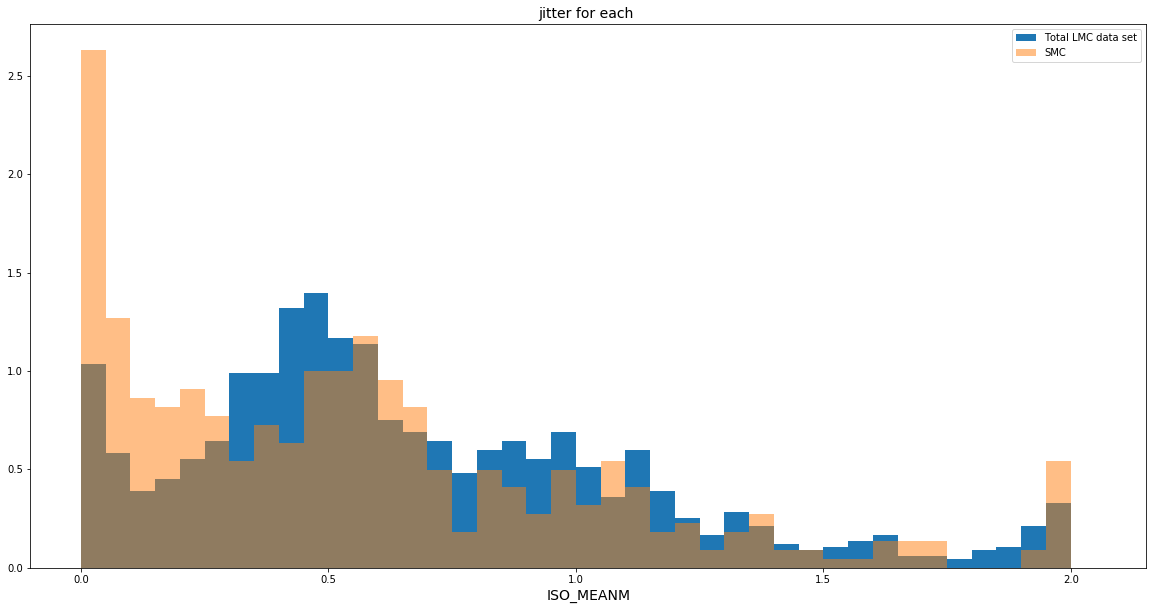

In [19]:
LMC_jitter = 2*0.015**(AllAvg_LMC_5['LOGG']/3)
SMC_jitter = 2*0.015**(AllAvg_SMC_5['LOGG']/3)
plt.figure(figsize=(20,10))
bins = np.arange(0, 2.1, 0.05)
plt.hist(LMC_jitter,bins = bins, label = 'Total LMC data set', density=True)
plt.hist(SMC_jitter,bins = bins, label = 'SMC', density=True, alpha = 0.5)
plt.legend()
plt.title('jitter for each ', size = 14)
plt.xlabel('ISO_MEANM', size = 14)
plt.show()

In [20]:
min(AllVis_LMC['SNR'])

5.00236

In [21]:
min(AllVis_LMC_SNR['SNR'])

NameError: name 'AllVis_LMC_SNR' is not defined

In [ ]:
    import os
    os.environ['PATH']